### DataFrame, where the dataset contains data of different mails and is classified into spam and not spam, the following are the tasks that are to be taken into consideration  while  constructing  LSTM  model,  to  predict  binary  classification 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\victo\Downloads\diy_dataset_tgv_e8fye8r.zip",delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

<Axes: xlabel='v1', ylabel='count'>

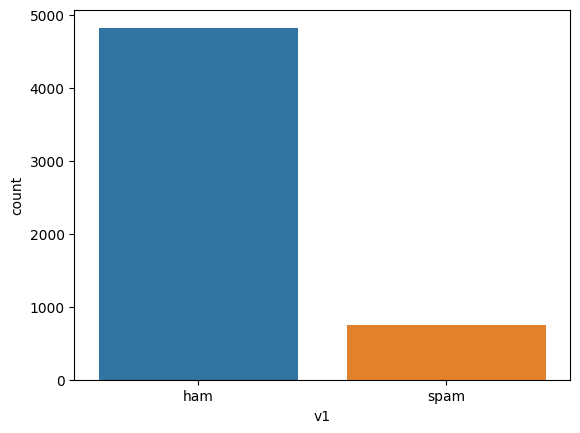

In [6]:
sns.countplot(x='v1',data=df,hue='v1')

In [7]:
x=df['v2']
y=df['v1']

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
#y=y.reshape(-1,1)
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [43]:
x_train.head()

786     It does it on its own. Most of the time it fix...
1763    Joy's father is John. Then John is the NAME of...
2123    +123 Congratulations - in this week's competit...
4377        Doing nothing, then u not having dinner w us?
322     cud u tell ppl im gona b a bit l8 cos 2 buses ...
Name: v2, dtype: object

In [46]:
y_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [49]:
#7.Generate tokens (max words = 1000) then convert them into numbers (text to sequence) and do padding as 150 for both train and 
#test data.

max_words=1500
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences=tok.texts_to_sequences(x_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
sequences_matrix.shape

(4457, 150)

In [51]:
#8.Create  a  new  function  and  declare  LSTM  and  all  other  layers  of  your model then call this method to create the 
#final RNN model. 
#functional ways of model creation we can do sequential as well

def RNN():
    inputs=Input(name='inputs',shape=[max_len])
    
    layer=Embedding(max_words,50,input_length=max_len)(inputs)
    
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)   #FC1 FULLY CONNECTED
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    
    model=Model(inputs=inputs,outputs=layer)
    
    return model


In [52]:
model=tf.keras.Sequential([
    
    tf.keras.layers.Input(name='inputs',shape=[max_len]),
    tf.keras.layers.Embedding(max_words,50,input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256,name='FC1'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,name='out_layer'),
    tf.keras.layers.Activation('sigmoid')
    
    
])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 50)           75000     
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
 activation_8 (Activation)   (None, 1)                

In [54]:
model=RNN()
model.summary()
model.compile(loss="binary_crossentropy", optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 150, 50)           75000     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [55]:
#9.Fit the final model on the train data set and measure accuracy on thetest dataset 

history = model.fit(sequences_matrix, y_train,batch_size=32, epochs=20,
                   validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
112/112 [==============================] - 19s 119ms/step - loss: 0.2142 - accuracy: 0.9285 - val_loss: 0.1040 - val_accuracy: 0.9720
Epoch 2/20
112/112 [==============================] - 12s 105ms/step - loss: 0.0515 - accuracy: 0.9854 - val_loss: 0.0755 - val_accuracy: 0.9821
Epoch 3/20
112/112 [==============================] - 12s 107ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0759 - val_accuracy: 0.9832


### Test score

In [64]:
max_words=1500
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(x_test)
sequences=tok.texts_to_sequences(x_test)
test_sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [65]:
test_sequences_matrix.shape

(1115, 150)

In [66]:
accr=model.evaluate(test_sequences_matrix,y_test)

35/35 [==============================] - 1s 39ms/step - loss: 0.6353 - accuracy: 0.8565


In [67]:
print('test set\n  Loss:{:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

test set
  Loss:0.635
 Accuracy: 0.857


#### Conclusion- As we can see that we have built a good model which is able to predict very accuracte with more than 85%